# Homework 9

## Problem 1: Game show

In [8]:
from numpy import random

##create the data file

data = open("Game_show_data.txt", "w")
data.write("First, play the game by switching door choices. For each game of five hundred games, the results are the following: " + '\n') ## introduction 

nwin = 0
nlose = 0


for i in range(1,501):
    doors = [1, 2, 3]
    prize = random.randint(1,4)
    choice_1 = random.randint(1,4)

    ## first, always change doors

    if choice_1 == prize:
        doors.remove(choice_1)
        door_remove = random.choice(doors) ## removed door is random door not prize door
        doors.remove(door_remove) ## removes removed door
        choice_2 = doors[0] ## other door is chosen
    else: ## first choice is not prize door
        doors.remove(choice_1) ## removes first choice
        doors.remove(prize) ## removes prize door
        door_remove = doors[0] ## door removed is the remaining door
        choice_2 = prize ## the remaining door is chosen, which is the prize door
    if choice_2 == prize:
        win = True
    else:
        win = False

    if win == True:
        data.write("YOU WIN!!!" + '\n')
        nwin += 1
        
    else:
        data.write("YOU LOSE!!!" + '\n')
        nlose += 1
        
probability_of_win = nwin / 500 ## probability of winning
probability_of_lose = nlose / 500 ## probability of losing

print(probability_of_win, probability_of_lose)

## NOW, ALWAYS KEEP THE SAME DOOR:

data.write("Now, play the game again, but this time, keep the initial door choice. After five hundred games, the results are the following: " + '\n')

doors = [1, 2, 3]
nwin = 0
nlose = 0
for i in range(1, 501):
    prize = random.randint(1,4)
    choice_1 = random.randint(1,4)

    if choice_1 == prize:
        win = True
    else: 
        win = False
    if win == True:
        data.write("YOU WIN!!!" + '\n')
        nwin += 1
    else:
        data.write("YOU LOSE!!!" + '\n')
        nlose+= 1
        
probability_of_win_2 = nwin / 500
probability_of_lose_2 = nlose / 500

data.write("Summary: " + '\n')

data.write("The probablility of winning when switching doors is " + str(probability_of_win) + "" + '\n') 
data.write("The probablility of losing when switching doors is " + str(probability_of_lose) + "" + '\n')

data.write("The probablility of winning when keeping the initial door choice is " + str(probability_of_win_2) + "" + '\n') 
data.write("The probablility of losing when keeping the initial door choice is " + str(probability_of_lose_2) + "" + '\n')

data.write("Conclusion: it is more probable to win by switching doors than it is to keep the initial door choice.")

data.close()

print(probability_of_win_2, probability_of_lose_2)

0.696 0.304
0.326 0.674


## Conclusion:
### Switching doors results in a higher likelyhood of wining the prize. In fact, the probability of winning and the probability of losing are opposites of each other for the two scenarios. 

## Problem 2: Radioactive decay

The total number of atoms remains 10000


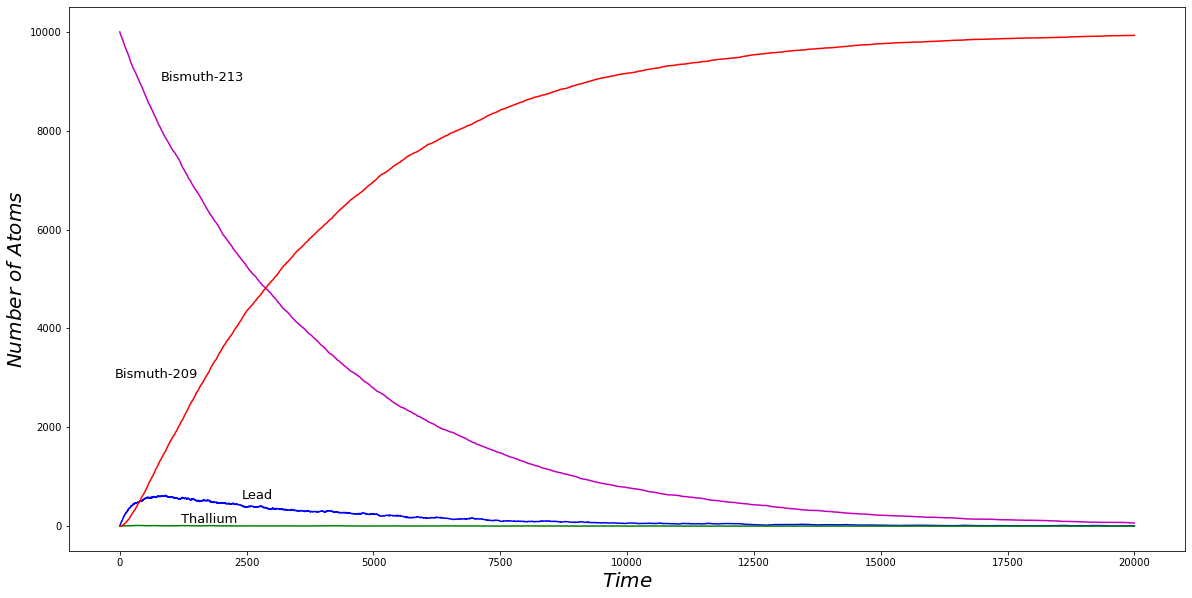

In [42]:
from random import random
import numpy as np
from matplotlib import pyplot as plt

h = 1.0             ## common data
tmax = 20000

super_cool = open("radioactive_decay_data.txt", "w") ## writing data file which will store atom levels

NBi_213 = 10000 ## decay data for Bismuth-213
tau_Bi = 46*60
p_Bi = 1 - 2**(-h/tau_Bi)

    
NTl = 0             ## decay data for Thallium to Lead              
tau_Tl = 2.2*60                     
p_Tl = 1 - 2**(-h/tau_Tl) 

NPb = 0             ## final decay data for Lead to Bismuth-209. 
NBi_209 = 0               
tau_Pb = 3.3*60        
p_Pb = 1 - 2**(-h/tau_Pb)   

          


tpoints = np.arange(0.0,tmax,h)     ## List of plot points
Bi_213_points = [] # Bismuth-213 points
Tlpoints = []   # Thallium points
Pbpoints = []    # Lead points
Bi_209_points = [] # Bismuth-209 points

## main decay loop

for t in tpoints:  
    
    super_cool.write(str(tpoints) + " " + str(NBi_213) + " " + str(NTl) + " " + str(NPb) + " " + str(NBi_209) + '\n') ## write data entries
    
    Bi_213_points.append(NBi_213)    ## appending points
    Tlpoints.append(NTl)     
    Pbpoints.append(NPb) 
    Bi_209_points.append(NBi_209) 
    
    decay_Bi_213_Tl = 0 ## decay for Bismuth-213 into Thallium and Lead
    decay_Bi_213_Pb = 0
    for i in range(NBi_213):
        if random() < p_Bi:
            if random() > 0.0209:
                decay_Bi_213_Pb += 1
            else:
                decay_Bi_213_Tl += 1
    NBi_213 -= decay_Bi_213_Pb 
    NBi_213 -= decay_Bi_213_Tl
    NTl += decay_Bi_213_Tl
    NPb += decay_Bi_213_Pb
    
    decay_Tl = 0           ## decay for Thallium into Lead
    for i in range(NTl): 
        if random() < p_Tl:
            decay_Tl += 1
    NTl -= decay_Tl
    NPb += decay_Tl

    
    decay_Pb = 0         ## decay for Lead into Bismuth-209
    for i in range(NPb): 
        if random() < p_Pb:
            decay_Pb += 1
    NPb -= decay_Pb
    NBi_209 += decay_Pb
    
    
print("The total number of atoms remains " + str(NBi_213 + NTl + NPb + NBi_209) + "")

fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.plot(tpoints,Bi_213_points, c ='m',) # plot Bi_213 vs. time
ax1.plot(tpoints,Pbpoints, c ='b') # plot Pb vs. time
ax1.plot(tpoints, Tlpoints, c = 'g') # plot Tl vs. time
ax1.plot(tpoints, Bi_209_points, c = 'r') # plot Bi_209 vs. time
ax1.set_xlabel("$Time$",size=20)  ## axis labes
ax1.set_ylabel("$Number$ $of$ $Atoms$",size=20)
ax1.text(1200, 60, "Thallium", size=13) ## curve labels
ax1.text(-100, 3000, "Bismuth-209", size=13)
ax1.text(800, 9000, "Bismuth-213", size=13)
ax1.text(2400, 550, "Lead", size=13)

plt.savefig("radioactive_decay.png") ## save the graph